In [1]:
import numpy as np
import center_algorithms as ca
import matplotlib.pyplot as plt

A script for examples for Sine Median and Maximum Cosine problems on Gr(k,n) where k>1

### To Do
    - Max Cosine not converging in robustness experiments
    - Comment cluster code

In [2]:
'''
This function verifies that we found a local optimizer for
the sine median or maximum cosine problem.
It does this by checking 100 points around the optimizer.

Inputs: 
    optimizer- a numpy array that represente the suggested optimizer
    opf_fn- a string, 'sine' for sine median and 'cosine' for maximum cosine
    data- a list of numpy arrays representing points on grassmannians
Outputs:
    local optimizer- True if all checked points rsesult in objective function values
                        that are greater than the Sine Median problem or smaller than
                        the Maximum Cosine value
'''
def sanity_check(optimizer, opt_fn, data):
    
    n,r = optimizer.shape
    
    
    #objective function value for suggested optimizer
    sln_val = ca.calc_error_1_2(data, optimizer, opt_fn) 
    
    #stays true if optimizer is a local min
    local_optimizer = True

    #checking random points
    perturb_vals = []
    for i in range(100):
        
        #random points between -.5 and .5 times .01
        perturb = (np.random.rand(n,r)-5)*.00001 
        perturb_check = np.linalg.qr(perturb + optimizer)[0][:,:r]
        
        #check objective function value
        perturb_vals.append(ca.calc_error_1_2(data, perturb_check, opt_fn))

        if opt_fn == 'sine' or opt_fn == 'l2_med':
            if perturb_vals[i] < sln_val:
                local_optimizer = False
#                 print(perturb_vals[i])
#                 print(sln_val)
#                 print('FlagIRLS did not converge to minimizer')
        elif opt_fn == 'cosine':
            if perturb_vals[i] > sln_val:
                local_optimizer = False
#                 print(perturb_vals[i])
#                 print(sln_val)
#                 print('FlagIRLS did not converge to maximizer')

    if not local_optimizer:
        print(sln_val)
        print(perturb_vals)
    return local_optimizer


## Convergence Experiment

In [3]:
k1=3 #Gr(k1,n)
k2=5 #Gr(k2,n)
r=3
n=20
n_its = 100 #number of iterations for FlagIRLS
seed = 1 #random seed
num_points = 20 #number of points in dataset
n_trials = 100 #number of trials for sanity check

In [4]:
#generate dataset of points in Gr(ki,n)
#half the points are in Gr(k1,n) and the second half are in Gr(k2,n)

np.random.seed(0)

gr_list = []
for i in range(1 + num_points//2):
    Y_raw = np.random.rand(n,k1)-.5
    Y = np.linalg.qr(Y_raw)[0][:,:k1]
    gr_list.append(Y)
for i in range(num_points//2):
    Y_raw = np.random.rand(n,k2)-.5
    Y = np.linalg.qr(Y_raw)[0][:,:k2]
    gr_list.append(Y)




In [5]:
#check robustness to initialization

#do n_trials

sin_corrects = 0
cos_corrects = 0

for seed in range(1,n_trials+1):
    #use different initialization for each trial using seed
    
    #calculate sine median
    sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
    print('Sine Median finished')

    #calculate maximum cosine
    max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
    print('Max Cos finished')
    
    
    if sanity_check(sin_median, 'sine', gr_list):
        sin_corrects += 1        
    if sanity_check(max_cosine, 'cosine', gr_list):
        cos_corrects += 1

print('Percent of trials that resulted in local optimizers:')
print('Sine: '+str(100* (sin_corrects/n_trials)))
print('Cos: '+str(100* (cos_corrects/n_trials)))

Sine Median finished
Max Cos finished
21.109022530271872
[21.109031484126355, 21.109033336788183, 21.109032497771285, 21.109032136423725, 21.109033772905754, 21.10903239277096, 21.10903211268995, 21.109031700050785, 21.109031868370604, 21.109031929517645, 21.10903318315357, 21.10903125374111, 21.109032764467358, 21.109032143501725, 21.10903347973562, 21.10903127431535, 21.109031707347576, 21.1090319812891, 21.109032342704648, 21.109030564375097, 21.109030417158667, 21.109033048410485, 21.10903311498325, 21.10903239633337, 21.10903224183213, 21.109031976779658, 21.109032912505754, 21.10903184822298, 21.109030505679858, 21.10903160110812, 21.109031001129534, 21.10903199942112, 21.109031425518967, 21.109033030296935, 21.10903075042007, 21.10903191169518, 21.109033796419308, 21.109030729775775, 21.109031757797915, 21.109032126195704, 21.109032193139868, 21.109031715584482, 21.10903275163545, 21.109031235956337, 21.109032693698065, 21.109030595174943, 21.10903415427825, 21.109031706563677, 

In [12]:
s_gd = ca.gradient_descent(gr_list, r, -.01, n_its, 'sine', seed = seed)[1]
c_gd = ca.gradient_descent(gr_list, r, -.01, n_its, 'cosine', seed = seed)[1]

Text(0, 0.5, 'Objective Function Value')

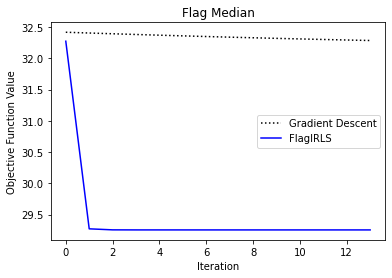

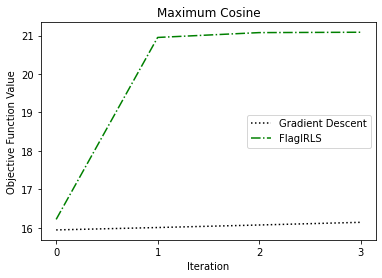

In [13]:
#convergence plots for last experiment

plt.figure()
plt.plot(s_gd[:len(s_err)], label = 'Gradient Descent', color = 'black', linestyle = 'dotted')
plt.plot(s_err, label = 'FlagIRLS', color = 'blue', linestyle = 'solid')
plt.title('Flag Median')
plt.legend()
# plt.xticks([n for n in range(0,21,5)])
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

plt.figure()
plt.plot(c_gd[:len(c_err)], label = 'Gradient Descent', color = 'black', linestyle = 'dotted')
plt.plot(c_err, label = 'FlagIRLS', color = 'green', linestyle = 'dashdot')
plt.title('Maximum Cosine')
plt.legend()
plt.xticks([n for n in range(0,4,1)])
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

## FlagIRLS is faster than L2-Median Algorithm

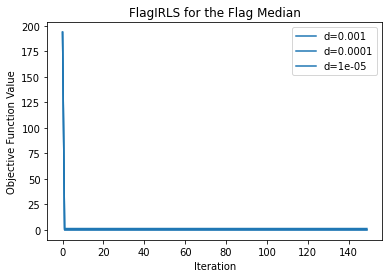

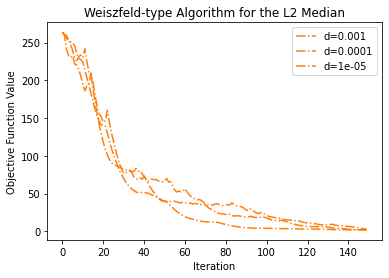

In [19]:
k=6 #Gr(k1,n)
r=6
n=100
n_its = 20 #number of iterations for FlagIRLS
seed = 0

num_points = 200 #number of points in dataset
n_trials = 100 #number of trials for sanity check

np.random.seed(0)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

linestyles = ['solid', 'dashed', 'dotted', 'dashdot']

for d in range(1,4):
    diameter = 10**(-2 - d)
    #generate dataset of points in Gr(k,n)
    gr_list = []
    for i in range(num_points):
        Y_raw = center_rep + (np.random.rand(n,k)-.5)*diameter
        Y = np.linalg.qr(Y_raw)[0][:,:k]
        gr_list.append(Y)

    #calculate flag mean
    flag_mean = ca.flag_mean(gr_list, r)

    #calculate sine median
    sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)

    #calc l2 median
    l2_med, l2_err = ca.l2_median(gr_list, .1, r, 150, seed)

    plt.figure('FlagIRLS')
    plt.plot(s_err+(150-len(s_err))*[s_err[-1]], color = 'tab:blue', linestyle =linestyles[d-1], label = 'd='+str(diameter))
    plt.figure('L2 Median')
    plt.plot(l2_err, color = 'tab:orange', linestyle =linestyles[d-1], label = 'd='+str(diameter))

plt.figure('FlagIRLS')
plt.title('FlagIRLS for the Flag Median')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()

plt.figure('L2 Median')
plt.title('Weiszfeld-type Algorithm for the L2 Median')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()

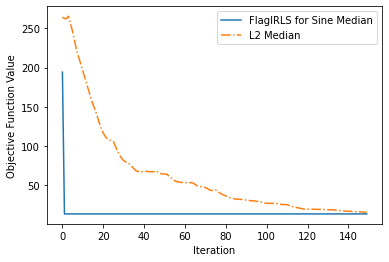

In [15]:
s_err

[194.08964657381458,
 13.687827414557503,
 13.687814753878492,
 13.687814753133058]

## Using one or a few subspaces to cluster data on Gr(k,n)

In [3]:
def calc_chordal_dist(X, Y, r):
    sum_sin = r- np.trace(X.T @ Y @ Y.T @ X)
    if sum_sin < 0:
        sum_sin = 0
    return np.sqrt(sum_sin)

def calc_min_angle(X, Y):
    return np.arccos(np.linalg.svd(X.T @ Y)[1][-1])


def calc_euclidean_dist(X, Y):
    return np.linalg.norm(X.flatten()-Y.flatten())

### L2-Median Test

In [4]:
num_points = 100
k=6
n=50
r=6

seed = np.random.seed(0)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

gr_list = []
for i in range(num_points):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.001
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)

In [5]:
l2_med, l2_err = ca.l2_median(gr_list, .1, r, 10000, seed)

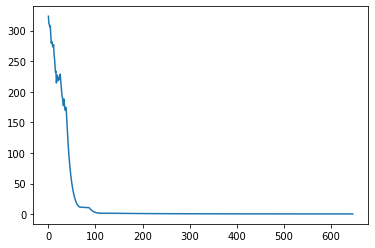

In [6]:
plt.plot(l2_err)

In [7]:
np.min(l2_err)

0.47612860172220695

In [8]:
sanity_check(l2_med, 'l2_med', gr_list)

True

### When do Flag Mean and Maximum Cosine Agree

In [9]:


k=6 #Gr(k1,n)
r=6
n=100
n_its = 20 #number of iterations for FlagIRLS


distances_cos_flg = []
distances_sin_cos = []
distances_sin_flg = []
distances_sin_l2 = []
distances_cos_l2 = []
distances_flg_l2 = []

for seed in range(20):
    num_points = 200 #number of points in dataset
    n_trials = 100 #number of trials for sanity check

    np.random.seed(0)

    center = np.random.rand(n,k)*10
    center_rep = np.linalg.qr(center)[0][:,:k]

    #generate dataset of points in Gr(k,n)



    gr_list = []
    for i in range(num_points):
        Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
        Y = np.linalg.qr(Y_raw)[0][:,:k]
        gr_list.append(Y)


    total_p = len(gr_list)
    D = np.zeros((total_p, total_p))
    for i in range(total_p):
        for j in range(i+1,total_p):
            D[i,j] = calc_chordal_dist(gr_list[i], gr_list[j], r)
            D[j,i] = D[i,j].copy()

#     fig = plt.figure()
#     im = plt.imshow(D, cmap = 'pink')
#     fig.colorbar(im)
#     plt.title('Chordal Distance Between Data Points')


    #calculate flag mean
    flag_mean = ca.flag_mean(gr_list, r)
#     print('Flag Mean finished')

    #calculate sine median
    sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)

    #calculate maximum cosine
    max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
#     print('Max Cos finished')

    #calc l2 median
    l2_med, l2_err = ca.l2_median(gr_list, .1, r, 1000, seed)


    if not sanity_check(max_cosine, 'cosine', gr_list):
        print('maximum cosine converged incorrectly') 

    distances_cos_flg.append(calc_chordal_dist(max_cosine, flag_mean, r))
    
    distances_sin_cos.append(calc_chordal_dist(max_cosine, sin_median, r))
    
    distances_sin_flg.append(calc_chordal_dist(flag_mean, sin_median, r))
    
    distances_sin_l2.append(calc_chordal_dist(l2_med, sin_median, r))
    
    distances_cos_l2.append(calc_chordal_dist(max_cosine, l2_med, r))
    
    distances_flg_l2.append(calc_chordal_dist(flag_mean, l2_med, r))
    

In [10]:
print('Average distance between max cosine and flag mean is '+str(np.mean(distances_cos_flg)))
print('Average distance between max cosine and sine median is '+str(np.mean(distances_sin_cos)))
print('Average distance between sine median and flag mean is '+str(np.mean(distances_sin_flg)))
print('Average distance between sine median and l2 median is '+str(np.mean(distances_sin_l2)))
print('Average distance between max cosine and l2 median is '+str(np.mean(distances_cos_l2)))
print('Average distance between flag mean and l2 median is '+str(np.mean(distances_flg_l2)))

Average distance between max cosine and flag mean is 6.686039088468559e-08
Average distance between max cosine and sine median is 9.35675955393061e-05
Average distance between sine median and flag mean is 9.349530123359285e-05
Average distance between sine median and l2 median is 0.009302604512672358
Average distance between max cosine and l2 median is 0.009304214425153435
Average distance between flag mean and l2 median is 0.009304212819955443


In [11]:
average_dist = 0
count = 0
for i in range(D.shape[0]):
    for j in range(i+1, D.shape[0]):
        average_dist+=D[i,j]
        count+=1
        
print('Average distance between points in the final dataset is '+str(average_dist/count))

Average distance between points in the final dataset is 0.09699740921111887


### Single Cluster Experiment

Flag Mean finished
Sine Median finished
Max Cos finished
L2 median finished
sine median converged correctly
maximum cosine converged correctly
4.12778619799882
[4.127742611380964, 4.12776437981268, 4.1278248851933785, 4.12778702374374, 4.12779082843567, 4.127773968169063, 4.127819115124884, 4.12777498638722, 4.127775576496069, 4.127750756878758, 4.127801954869983, 4.127778765343423, 4.127809889092668, 4.127768732622195, 4.127815163098705, 4.127767088882945, 4.127791257489696, 4.1278238157348, 4.127811924097691, 4.127768638142534, 4.127760995930426, 4.12775591538287, 4.127771113257322, 4.127769530567961, 4.127837877277477, 4.127743129918165, 4.127777253860093, 4.127771822912452, 4.12782048802184, 4.127793655327202, 4.1278370322303, 4.127733474237635, 4.127739539981746, 4.127781533538868, 4.1277695337703495, 4.127817845830128, 4.127807772427175, 4.127782451757031, 4.127783202627723, 4.127805015162593, 4.127811300949066, 4.127811015232498, 4.127824115663069, 4.12780412203753, 4.1278123023

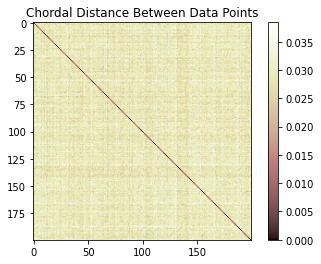

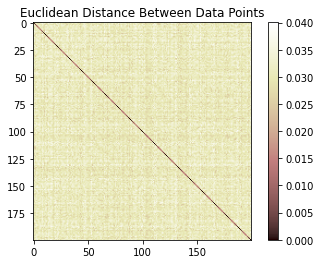

In [13]:


k=3 #Gr(k1,n)
r=3
n=20
n_its = 20 #number of iterations for FlagIRLS
seed = 1 #random seed
num_points = 200 #number of points in dataset
n_trials = 100 #number of trials for sanity check

np.random.seed(0)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

#generate dataset of points in Gr(k,n)



gr_list = []
for i in range(num_points):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)

    
total_p = len(gr_list)
D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_chordal_dist(gr_list[i], gr_list[j], r)
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Chordal Distance Between Data Points')

D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_euclidean_dist(gr_list[i], gr_list[j])
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Euclidean Distance Between Data Points')

#calculate flag mean
flag_mean = ca.flag_mean(gr_list, r)
print('Flag Mean finished')

#calculate sine median
sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
print('Sine Median finished')

#calculate maximum cosine
max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
print('Max Cos finished')

#calculate l2 median
l2_med, l2_err = ca.l2_median(gr_list, .1, r, 1000, seed)
print('L2 median finished')
    
if sanity_check(sin_median, 'sine', gr_list):
    print('sine median converged correctly')      
if sanity_check(max_cosine, 'cosine', gr_list):
    print('maximum cosine converged correctly') 
if sanity_check(l2_med, 'l2_med', gr_list):
    print('l2 median converged correctly') 
    


print('.')
print('.')
print('.')
    
print('flag mean chordal dist is: ' +str(calc_chordal_dist(center_rep, flag_mean, r)))

print('sine median chordal dist is: ' +str(calc_chordal_dist(center_rep, sin_median, r)))

print('maximum cosine chordal dist is: ' +str(calc_chordal_dist(center_rep, max_cosine, r)))

print('l2 median chordal dist is: ' +str(calc_chordal_dist(center_rep, l2_med, r)))

print('.')
print('.')
print('.')

print('flag mean min principal angle is: ' +str(calc_min_angle(center_rep, flag_mean)))

print('sine median min principal angle is: ' +str(calc_min_angle(center_rep, sin_median)))

print('maximum cosine min principal angle is: ' +str(calc_min_angle(center_rep, max_cosine)))

print('l2 median min principal angle is: ' +str(calc_min_angle(center_rep, l2_med)))

# print('.')
# print('.')
# print('.')

# print('flag mean euclidean dist is: ' +str(calc_euclidean_dist(center_rep, flag_mean)))

# print('sine median euclidean dist is: ' +str(calc_euclidean_dist(center_rep, sin_median)))

# print('maximum cosine euclidean dist is: ' +str(calc_euclidean_dist(center_rep, max_cosine)))

### Single Cluster with 10% Outliers

Flag Mean finished
Sine Median finished
Max Cos finished
L2 median finished
sine median converged correctly
maximum cosine converged correctly
l2 median converged correctly
.
.
.
flag mean chordal dist is: 0.012849444601646682
sine median chordal dist is: 0.0017154878452136746
maximum cosine chordal dist is: 0.03305723281133359
l2 median chordal dist is: 0.002166335530392535
.
.
.
flag mean min principal angle is: 0.009122098093849926
sine median min principal angle is: 0.0012923623755189651
maximum cosine min principal angle is: 0.022583815383471248
l2 median min principal angle is: 0.0016473174622539297


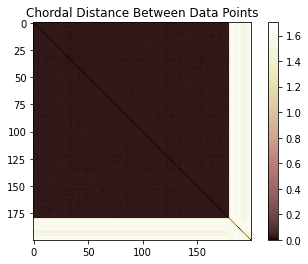

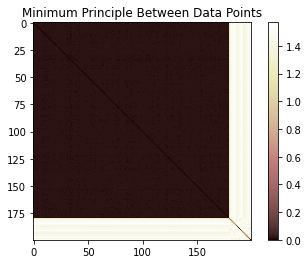

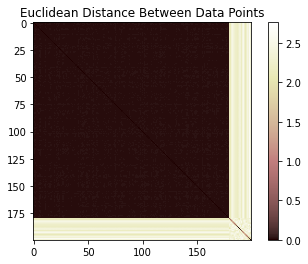

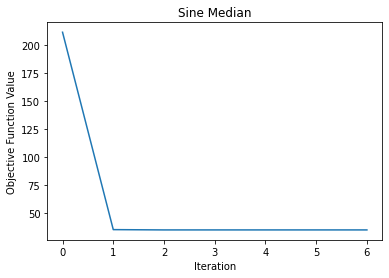

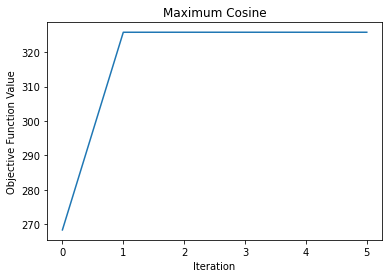

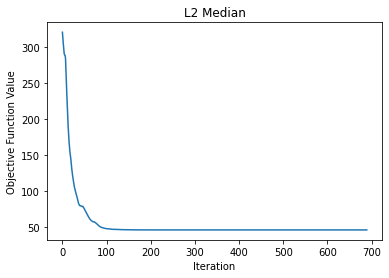

In [15]:
k=3 #Gr(k1,n)
r=3
n=20
n_its = 20 #number of iterations for FlagIRLS
seed = 1 #random seed
num_points = 200 #number of points in dataset
n_trials = 100 #number of trials for sanity check

np.random.seed(seed)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

#generate dataset of points in Gr(k,n)



gr_list = []
for i in range(num_points- np.int(num_points*.10)):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
for i in range(np.int(num_points*.10)):
    Y_raw = np.random.rand(n,k)-.5
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
total_p = len(gr_list)
D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_chordal_dist(gr_list[i], gr_list[j], r)
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Chordal Distance Between Data Points')

D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_min_angle(gr_list[i], gr_list[j])
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Minimum Principle Between Data Points')

D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_euclidean_dist(gr_list[i], gr_list[j])
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Euclidean Distance Between Data Points')

#calculate flag mean
flag_mean = ca.flag_mean(gr_list, r)
print('Flag Mean finished')

#calculate sine median
sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
print('Sine Median finished')

#calculate maximum cosine
max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
print('Max Cos finished')

#calculate l2 median
l2_med, l2_err = ca.l2_median(gr_list, .1, r, 1000, seed)
print('L2 median finished')
    
if sanity_check(sin_median, 'sine', gr_list):
    print('sine median converged correctly')      
if sanity_check(max_cosine, 'cosine', gr_list):
    print('maximum cosine converged correctly') 
if sanity_check(l2_med, 'l2_med', gr_list):
    print('l2 median converged correctly') 
    
plt.figure()
plt.plot(s_err)
plt.title('Sine Median')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

plt.figure()
plt.plot(c_err)
plt.title('Maximum Cosine')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

plt.figure()
plt.plot(l2_err)
plt.title('L2 Median')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')

print('.')
print('.')
print('.')
    
print('flag mean chordal dist is: ' +str(calc_chordal_dist(center_rep, flag_mean, r)))

print('sine median chordal dist is: ' +str(calc_chordal_dist(center_rep, sin_median, r)))

print('maximum cosine chordal dist is: ' +str(calc_chordal_dist(center_rep, max_cosine, r)))

print('l2 median chordal dist is: ' +str(calc_chordal_dist(center_rep, l2_med, r)))

print('.')
print('.')
print('.')

print('flag mean min principal angle is: ' +str(calc_min_angle(center_rep, flag_mean)))

print('sine median min principal angle is: ' +str(calc_min_angle(center_rep, sin_median)))

print('maximum cosine min principal angle is: ' +str(calc_min_angle(center_rep, max_cosine)))

print('l2 median min principal angle is: ' +str(calc_min_angle(center_rep, l2_med)))

# print('.')
# print('.')
# print('.')

# print('flag mean euclidean dist is: ' +str(calc_euclidean_dist(center_rep, flag_mean)))

# print('sine median euclidean dist is: ' +str(calc_euclidean_dist(center_rep, sin_median)))

# print('maximum cosine euclidean dist is: ' +str(calc_euclidean_dist(center_rep, max_cosine)))

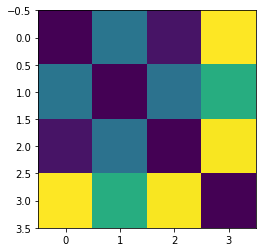

In [16]:
D = np.zeros((4,4))
D[0,1] = calc_chordal_dist(center_rep, flag_mean, r)
D[0,2] = calc_chordal_dist(center_rep, sin_median, r)
D[0,3] = calc_chordal_dist(center_rep, max_cosine, r)
D[1,2] = calc_chordal_dist(flag_mean, sin_median, r)
D[1,3] = calc_chordal_dist(flag_mean, max_cosine, r)
D[2,3] = calc_chordal_dist(sin_median, max_cosine, r)

D = D + D.T
plt.imshow(D)


### Two Clusters of the Same Size

Flag Mean finished
Sine Median finished
Max Cos finished
sine median converged correctly
.
.
.
flag mean chordal dist from center 1 and 2 are: 0.9156861966473274, 0.9162629652939442
sine median chordal dist from center 1 and 2 are: 0.007631539541247656, 1.4126718197491916
maximum cosine chordal dist from center 1 and 2 are: 0.42557576597731406, 1.2431145457609454
.
.
.
flag mean min principal angle is: 0.7739101392089994, 0.7750323430765905
sine median min principal angle is: 0.005936946277651299, 1.5489091917489863
maximum cosine min principal angle is: 0.4010578405126599, 1.4929384262998069


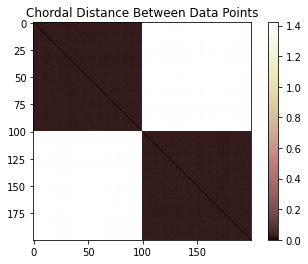

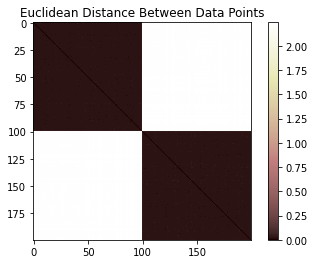

In [15]:
k=3 #Gr(k1,n)
r=3
n=20
n_its = 20 #number of iterations for FlagIRLS
seed = 1 #random seed
num_points = 200 #number of points in dataset
n_trials = 100 #number of trials for sanity check

np.random.seed(seed)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

center2 = np.random.rand(n,k)*10
center2_rep = np.linalg.qr(center2)[0][:,:k]

#generate dataset of points in Gr(k,n)



gr_list = []
for i in range(num_points//2):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
for i in range(num_points//2):
    Y_raw = center2_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
total_p = len(gr_list)
D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_chordal_dist(gr_list[i], gr_list[j], r)
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Chordal Distance Between Data Points')

D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_euclidean_dist(gr_list[i], gr_list[j])
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Euclidean Distance Between Data Points')

#calculate flag mean
flag_mean = ca.flag_mean(gr_list, r)
print('Flag Mean finished')

#calculate sine median
sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
print('Sine Median finished')

#calculate maximum cosine
max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
print('Max Cos finished')
    
if sanity_check(sin_median, 'sine', gr_list):
    print('sine median converged correctly')      
if sanity_check(max_cosine, 'cosine', gr_list):
    print('maximum cosine converged correctly') 
    


print('.')
print('.')
print('.')
    
print('flag mean chordal dist from center 1 and 2 are: ' +str(calc_chordal_dist(center_rep, flag_mean, r))+', '+ str(calc_chordal_dist(center2_rep, flag_mean, r)))

print('sine median chordal dist from center 1 and 2 are: ' +str(calc_chordal_dist(center_rep, sin_median, r))+', '+ str(calc_chordal_dist(center2_rep, sin_median, r)))

print('maximum cosine chordal dist from center 1 and 2 are: ' +str(calc_chordal_dist(center_rep, max_cosine, r))+', '+ str(calc_chordal_dist(center2_rep, max_cosine, r)))

print('.')
print('.')
print('.')

print('flag mean min principal angle is: ' +str(calc_min_angle(center_rep, flag_mean))+', '+ str(calc_min_angle(center2_rep, flag_mean)))

print('sine median min principal angle is: ' +str(calc_min_angle(center_rep, sin_median))+', '+ str(calc_min_angle(center2_rep, sin_median)))

print('maximum cosine min principal angle is: ' +str(calc_min_angle(center_rep, max_cosine))+', '+ str(calc_min_angle(center2_rep, max_cosine)))

### Three Clusters of the Same Size

Flag Mean finished
Sine Median finished
Max Cos finished
sine median converged correctly
maximum cosine converged correctly
.
.
.
flag mean chordal dist from center 1, 2 and 3 are: 1.0170970796895373, 1.0336670423034162, 1.0801871706630772
sine median chordal dist from center 1, 2 and 3 are: 0.014333200524942899, 1.4116455465492177, 1.0801871706630772
maximum cosine chordal dist from center 1, 2 and 3 are: 1.0258579144508417, 1.0349764743666967, 1.0801871706630772


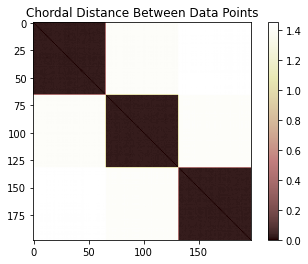

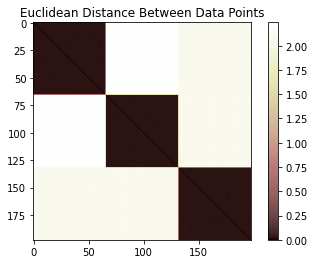

In [16]:
k=3 #Gr(k1,n)
r=3
n=20
n_its = 20 #number of iterations for FlagIRLS
seed = 1 #random seed
num_points = 200 #number of points in dataset
n_trials = 100 #number of trials for sanity check

np.random.seed(seed)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

center2 = np.random.rand(n,k)*10
center2_rep = np.linalg.qr(center2)[0][:,:k]

center3 = np.random.rand(n,k)*10
center3_rep = np.linalg.qr(center3)[0][:,:k]

#generate dataset of points in Gr(k,n)



gr_list = []
for i in range(num_points//3):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
for i in range(num_points//3):
    Y_raw = center2_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
for i in range(num_points//3):
    Y_raw = center3_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)
    
total_p = len(gr_list)
D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_chordal_dist(gr_list[i], gr_list[j], r)
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Chordal Distance Between Data Points')

D = np.zeros((total_p, total_p))
for i in range(total_p):
    for j in range(i+1,total_p):
        D[i,j] = calc_euclidean_dist(gr_list[i], gr_list[j])
        D[j,i] = D[i,j].copy()

fig = plt.figure()
im = plt.imshow(D, cmap = 'pink')
fig.colorbar(im)
plt.title('Euclidean Distance Between Data Points')

#calculate flag mean
flag_mean = ca.flag_mean(gr_list, r)
print('Flag Mean finished')

#calculate sine median
sin_median, s_err = ca.irls_flag(gr_list, r, n_its, 'sine', opt_err = 'sine', fast = False, seed = seed)
print('Sine Median finished')

#calculate maximum cosine
max_cosine, c_err = ca.irls_flag(gr_list, r, n_its, 'cosine', opt_err = 'cosine', fast = False, seed = seed)
print('Max Cos finished')
    
if sanity_check(sin_median, 'sine', gr_list):
    print('sine median converged correctly')      
if sanity_check(max_cosine, 'cosine', gr_list):
    print('maximum cosine converged correctly') 
    

print('.')
print('.')
print('.')
    
print('flag mean chordal dist from center 1, 2 and 3 are: ' +str(calc_chordal_dist(center_rep, flag_mean, r))+', '+ str(calc_chordal_dist(center2_rep, flag_mean, r))+', '+ str(calc_chordal_dist(center3_rep, flag_mean, r)))

print('sine median chordal dist from center 1, 2 and 3 are: ' +str(calc_chordal_dist(center_rep, sin_median, r))+', '+ str(calc_chordal_dist(center2_rep, sin_median, r))+', '+ str(calc_chordal_dist(center3_rep, flag_mean, r)))

print('maximum cosine chordal dist from center 1, 2 and 3 are: ' +str(calc_chordal_dist(center_rep, max_cosine, r))+', '+ str(calc_chordal_dist(center2_rep, max_cosine, r))+', '+ str(calc_chordal_dist(center3_rep, flag_mean, r)))


